In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
!ls /content

drive  sample_data


In [4]:
!ls /content

drive  sample_data


In [5]:
from google.colab import files
uploaded = files.upload()


KeyboardInterrupt: 

In [6]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
!ls "/content/drive/MyDrive"  # 여기서 zip 있는지 확인
!unzip "/content/drive/MyDrive/SDNET2018.zip" -d /content/SDNET2018


'Colab Notebooks'
unzip:  cannot find or open /content/drive/MyDrive/SDNET2018.zip, /content/drive/MyDrive/SDNET2018.zip.zip or /content/drive/MyDrive/SDNET2018.zip.ZIP.


In [9]:
!ls "/content/drive/MyDrive"

'Colab Notebooks'


In [11]:
!ls "/content/drive/MyDrive/Colab Notebooks"
!unzip "/content/drive/MyDrive/SDNET2018.zip" -d /content/SDNET2018

bridge_project.ipynb  SDNET2018.zip  Untitled0.ipynb
unzip:  cannot find or open /content/drive/MyDrive/SDNET2018.zip, /content/drive/MyDrive/SDNET2018.zip.zip or /content/drive/MyDrive/SDNET2018.zip.ZIP.


In [13]:
!unzip "/content/drive/MyDrive/Colab Notebooks/SDNET2018.zip" -d /content/SDNET2018

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: /content/SDNET2018/Walls/Non-cracked/7117-203.jpg  
  inflating: /content/SDNET2018/Walls/Non-cracked/7117-204.jpg  
  inflating: /content/SDNET2018/Walls/Non-cracked/7117-205.jpg  
  inflating: /content/SDNET2018/Walls/Non-cracked/7117-206.jpg  
  inflating: /content/SDNET2018/Walls/Non-cracked/7117-207.jpg  
  inflating: /content/SDNET2018/Walls/Non-cracked/7117-208.jpg  
  inflating: /content/SDNET2018/Walls/Non-cracked/7117-21.jpg  
  inflating: /content/SDNET2018/Walls/Non-cracked/7117-211.jpg  
  inflating: /content/SDNET2018/Walls/Non-cracked/7117-212.jpg  
  inflating: /content/SDNET2018/Walls/Non-cracked/7117-213.jpg  
  inflating: /content/SDNET2018/Walls/Non-cracked/7117-214.jpg  
  inflating: /content/SDNET2018/Walls/Non-cracked/7117-215.jpg  
  inflating: /content/SDNET2018/Walls/Non-cracked/7117-216.jpg  
  inflating: /content/SDNET2018/Walls/Non-cracked/7117-217.jpg  
  inflating: /content/SDNET2018/Walls/Non-cracked/7117-

In [14]:
# PyTorch, torchvision, PIL 등 설치
!pip install torch torchvision torchaudio
!pip install matplotlib
!pip install opencv-python
!pip install gradio  # 업로드 UI용


In [19]:
import os
from torchvision import transforms
from PIL import Image

data_dir = "/content/drive/MyDrive/Colab Notebooks/SDNET2018.zip"
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

images, labels = [], []
for label, folder in enumerate(['NoCrack', 'Crack']):
    path = os.path.join(data_dir, folder)
    for img_file in os.listdir(path):
        img_path = os.path.join(path, img_file)
        img = Image.open(img_path).convert('RGB')
        img = transform(img)
        images.append(img)
        labels.append(label)


NotADirectoryError: [Errno 20] Not a directory: '/content/drive/MyDrive/Colab Notebooks/SDNET2018.zip/NoCrack'

In [20]:
# 1. 압축 풀기
!unzip -q "/content/drive/MyDrive/Colab Notebooks/SDNET2018.zip" -d "/content/SDNET2018"

# 2. 압축이 제대로 풀렸는지 확인
!ls /content/SDNET2018


replace /content/SDNET2018/Decks/Cracked/7001-115.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: Decks  Pavements  Walls


In [21]:
!ls /content/SDNET2018


Decks  Pavements  Walls


In [23]:
import os
from torchvision import transforms
from PIL import Image

data_dir = "/content/drive/MyDrive/Colab Notebooks/SDNET2018.zip"

transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

images, labels = [], []

for category in ['Decks', 'Pavements', 'Walls']:
    for label, folder in enumerate(['NoCrack', 'Crack']):
        path = os.path.join(data_dir, category, folder)
        for img_file in os.listdir(path):
            img_path = os.path.join(path, img_file)
            img = Image.open(img_path).convert('RGB')
            img = transform(img)
            images.append(img)
            labels.append(label)


NotADirectoryError: [Errno 20] Not a directory: '/content/drive/MyDrive/Colab Notebooks/SDNET2018.zip/Decks/NoCrack'

In [24]:
# 1️⃣ 라이브러리 불러오기
import os
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import torch

# 2️⃣ 압축 풀기 (Colab VM의 /content/SDNET2018에)
!unzip -q "/content/drive/MyDrive/Colab Notebooks/SDNET2018.zip" -d "/content/SDNET2018"

# 3️⃣ 압축 풀린 폴더 구조 확인
!ls /content/SDNET2018

# 4️⃣ 이미지 전처리 정의
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

# 5️⃣ PyTorch용 Dataset 클래스 정의
class SDNETDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.images = []
        self.labels = []
        self.transform = transform

        categories = ['Decks', 'Pavements', 'Walls']
        for category in categories:
            for label, folder in enumerate(['NoCrack', 'Crack']):
                path = os.path.join(root_dir, category, folder)
                if not os.path.isdir(path):
                    continue  # 폴더가 없으면 건너뜀
                for img_file in os.listdir(path):
                    img_path = os.path.join(path, img_file)
                    self.images.append(img_path)
                    self.labels.append(label)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        label = self.labels[idx]
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, label

# 6️⃣ Dataset과 DataLoader 생성
data_dir = "/content/SDNET2018"
dataset = SDNETDataset(data_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# 7️⃣ 데이터 확인 (첫 배치)
images, labels = next(iter(dataloader))
print(images.shape, labels.shape)


replace /content/SDNET2018/Decks/Cracked/7001-115.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: Decks  Pavements  Walls


ValueError: num_samples should be a positive integer value, but got num_samples=0

In [25]:
!ls "/content/drive/MyDrive/Colab Notebooks"


bridge_project.ipynb  SDNET2018.zip  Untitled0.ipynb


In [26]:
!ls "/content/drive/MyDrive/Colab Notebooks"


bridge_project.ipynb  SDNET2018.zip  Untitled0.ipynb


In [27]:
!ls "/content/drive/MyDrive/Colab Notebooks"



bridge_project.ipynb  SDNET2018.zip  Untitled0.ipynb


In [28]:
/content/SDNET2018/


NameError: name 'content' is not defined

In [29]:
!ls /content/SDNET2018


Decks  Pavements  Walls


In [30]:
!ls /content/SDNET2018/Decks


Cracked  Non-cracked


In [31]:
# Dataset 클래스에서
for label, folder in enumerate(['NonCracked', 'Cracked']):
    path = os.path.join(root_dir, category, folder)
    ...


NameError: name 'root_dir' is not defined

In [32]:
class SDNETDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.images = []
        self.labels = []
        self.transform = transform

        categories = ['Decks', 'Pavements', 'Walls']
        for category in categories:
            for label, folder in enumerate(['NonCracked', 'Cracked']):  # 수정됨
                path = os.path.join(root_dir, category, folder)
                if not os.path.isdir(path):
                    continue
                for img_file in os.listdir(path):
                    img_path = os.path.join(path, img_file)
                    self.images.append(img_path)
                    self.labels.append(label)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        label = self.labels[idx]
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, label


In [33]:
import torch
import torch.nn as nn
import torchvision.models as models

model = models.mobilenet_v2(pretrained=True)
model.classifier[1] = nn.Linear(model.last_channel, 2)  # Crack / NoCrack


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


100%|██████████| 13.6M/13.6M [00:00<00:00, 42.6MB/s]


In [34]:
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

dataset = TensorDataset(torch.stack(images), torch.tensor(labels))
loader = DataLoader(dataset, batch_size=16, shuffle=True)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(3):  # 3 epoch만 돌려도 데모 가능
    for imgs, lbls in loader:
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, lbls)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1} 완료")


RuntimeError: stack expects a non-empty TensorList

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# 1. 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 2. 데이터 전처리 및 증강
datagen = ImageDataGenerator(
    rescale=1./255,           # 픽셀 0~1 정규화
    validation_split=0.2,     # 80% 학습, 20% 검증
    horizontal_flip=True,
    rotation_range=10
)

# 학습용 데이터
train_gen = datagen.flow_from_directory(
    '/content/SDNET2018',
    target_size=(128,128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

# 검증용 데이터
val_gen = datagen.flow_from_directory(
    '/content/SDNET2018',
    target_size=(128,128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# 3. CNN 모델 정의
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # binary classification
])

# 4. 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 5. 모델 학습
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10  # 필요하면 20~30으로 늘릴 수 있음
)

# 6. 학습 결과 시각화
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 7. 위험도 판단 함수 정의
def predict_risk(img_path):
    from tensorflow.keras.preprocessing import image
    img = image.load_img(img_path, target_size=(128,128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array)[0][0]

    if pred < 0.4:
        risk = "낮음 (관찰 필요)"
    elif pred < 0.7:
        risk = "보통 (주기적 점검 권장)"
    else:
        risk = "높음 (즉시 점검/보수 권장)"

    print(f"균열 확률: {pred:.2f} → 위험도: {risk}")
    return risk

# 8. 테스트 예시
# predict_risk('/content/SDNET2018/cracked/example.jpg')



FileNotFoundError: [Errno 2] No such file or directory: '/content/SDNET2018'

Found 44875 images belonging to 3 classes.
Found 11217 images belonging to 3 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 264s 184ms/step - accuracy: 0.4320 - loss: -5812707328.0000 - val_accuracy: 0.4338 - val_loss: -188679962624.0000
Epoch 2/10
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 253s 180ms/step - accuracy: 0.4343 - loss: -526439284736.0000 - val_accuracy: 0.4338 - val_loss: -3501964132352.0000
Epoch 3/10
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 254s 181ms/step - accuracy: 0.4338 - loss: -6256746037248.0000 - val_accuracy: 0.4338 - val_loss: -18326315073536.0000
Epoch 4/10
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 289s 206ms/step - accuracy: 0.4328 - loss: -24939824414720.0000 - val_accuracy: 0.4338 - val_loss: -56639575031808.0000
Epoch 5/10
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 254s 181ms/step - accuracy: 0.4308 - loss: -75351350837248.0000 - val_accuracy: 0.4338 - val_loss: -133696736722944.0000
Epoch 6/10
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 252s 180ms/step - accuracy: 0.4346 - loss: -151732101316608.0000 - val_accuracy: 0.4338 - val_loss: -266087920828416.0000
Epoch 7/10
1403/1403 ━━━━━━━━━━━━━━

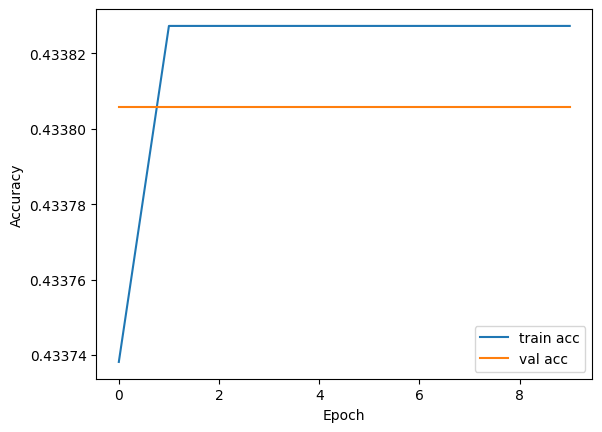

In [6]:
# 1. 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 2. 데이터 전처리 및 증강
datagen = ImageDataGenerator(
    rescale=1./255,           # 픽셀 0~1 정규화
    validation_split=0.2,     # 80% 학습, 20% 검증
    horizontal_flip=True,
    rotation_range=10
)

# 학습용 데이터
train_gen = datagen.flow_from_directory(
    '/content/SDNET2018',
    target_size=(128,128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

# 검증용 데이터
val_gen = datagen.flow_from_directory(
    '/content/SDNET2018',
    target_size=(128,128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# 3. CNN 모델 정의
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # binary classification
])

# 4. 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 5. 모델 학습
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10  # 필요하면 20~30으로 늘릴 수 있음
)

# 6. 학습 결과 시각화
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 7. 위험도 판단 함수 정의
def predict_risk(img_path):
    from tensorflow.keras.preprocessing import image
    img = image.load_img(img_path, target_size=(128,128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array)[0][0]

    if pred < 0.4:
        risk = "낮음 (관찰 필요)"
    elif pred < 0.7:
        risk = "보통 (주기적 점검 권장)"
    else:
        risk = "높음 (즉시 점검/보수 권장)"

    print(f"균열 확률: {pred:.2f} → 위험도: {risk}")
    return risk

# 8. 테스트 예시
# predict_risk('/content/SDNET2018/cracked/example.jpg')

In [7]:
# 모델 저장
model.save('/content/bridge_crack_model.h5')


In [3]:
!ls /content/SDNET2018


ls: cannot access '/content/SDNET2018': No such file or directory


In [8]:
from tensorflow.keras.models import load_model

# 학습한 모델 불러오기
model = load_model('/content/bridge_crack_model.h5')


In [4]:
!ls "/content/drive/MyDrive/Colab Notebooks"
!unzip "/content/drive/MyDrive/SDNET2018.zip" -d /content/SDNET2018

archive  bridge_project.ipynb  SDNET2018.zip  Untitled0.ipynb
unzip:  cannot find or open /content/drive/MyDrive/SDNET2018.zip, /content/drive/MyDrive/SDNET2018.zip.zip or /content/drive/MyDrive/SDNET2018.zip.ZIP.


In [9]:
from google.colab import files

uploaded = files.upload()  # 업로드 창 열림


Saving IMG_2581.HEIC to IMG_2581.HEIC


In [10]:
for filename in uploaded.keys():
    predict_risk(filename)


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7a0c21056fc0>

In [11]:
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
    # BytesIO -> 실제 파일로 저장
    with open(filename, 'wb') as f:
        f.write(uploaded[filename])

    # 저장한 파일 경로로 predict_risk 호출
    predict_risk(filename)


Saving IMG_2581.HEIC to IMG_2581 (1).HEIC


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7a0c1a13ef70>

In [14]:
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
    # BytesIO -> 실제 파일로 저장
    with open(filename, 'wb') as f:
        f.write(uploaded[filename])

    # 저장한 파일 경로로 predict_risk 호출
    predict_risk(filename)

Saving IMG_2581.jpg to IMG_2581.jpg


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7a0c1a06e070>

In [15]:
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
    save_path = filename  # 실제로 저장한 경로
    with open(save_path, 'wb') as f:
        f.write(uploaded[filename])

    # 저장한 경로를 predict_risk에 전달
    predict_risk(save_path)


Saving IMG_2581.jpg to IMG_2581 (1).jpg


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7a0c1a06d170>

In [16]:
from google.colab import files
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image

# 1. 학습한 모델 불러오기
model = load_model('/content/bridge_crack_model.h5')

# 2. 위험도 판단 함수
def predict_risk(img_path):
    img = image.load_img(img_path, target_size=(128,128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array)[0][0]

    if pred < 0.4:
        risk = "낮음 (관찰 필요)"
    elif pred < 0.7:
        risk = "보통 (주기적 점검 권장)"
    else:
        risk = "높음 (즉시 점검/보수 권장)"

    print(f"균열 확률: {pred:.2f} → 위험도: {risk}")
    return risk

# 3. 사진 업로드 및 예측
uploaded = files.upload()  # 업로드 창

for original_filename in uploaded.keys():
    # 파일을 실제로 저장 (원본 이름 그대로)
    save_path = original_filename
    with open(save_path, 'wb') as f:
        f.write(uploaded[original_filename])

    print(f"파일 저장 완료: {save_path}")

    # 저장한 파일 경로를 predict_risk에 전달
    predict_risk(save_path)


Saving IMG_2581.jpg to IMG_2581 (2).jpg
파일 저장 완료: IMG_2581 (2).jpg


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7a0c1a13f150>

In [17]:
from google.colab import files
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image

# 1. 학습한 모델 불러오기
model = load_model('/content/bridge_crack_model.h5')

# 2. 위험도 판단 함수
def predict_risk(img_path):
    img = image.load_img(img_path, target_size=(128,128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array)[0][0]

    if pred < 0.4:
        risk = "낮음 (관찰 필요)"
    elif pred < 0.7:
        risk = "보통 (주기적 점검 권장)"
    else:
        risk = "높음 (즉시 점검/보수 권장)"

    print(f"균열 확률: {pred:.2f} → 위험도: {risk}")
    return risk

# 3. 사진 업로드 및 예측
uploaded = files.upload()  # 업로드 창

for original_filename in uploaded.keys():
    # 파일을 실제로 저장 (원본 이름 그대로)
    save_path = original_filename
    with open(save_path, 'wb') as f:
        f.write(uploaded[original_filename])

    print(f"파일 저장 완료: {save_path}")

    # 저장한 파일 경로를 predict_risk에 전달
    predict_risk(save_path)


Saving a.jpeg to a.jpeg
파일 저장 완료: a.jpeg


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7a0c1a06eca0>

In [5]:
!unzip "/content/drive/MyDrive/Colab Notebooks/SDNET2018.zip" -d /content/SDNET2018

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: /content/SDNET2018/Walls/Non-cracked/7117-203.jpg  
  inflating: /content/SDNET2018/Walls/Non-cracked/7117-204.jpg  
  inflating: /content/SDNET2018/Walls/Non-cracked/7117-205.jpg  
  inflating: /content/SDNET2018/Walls/Non-cracked/7117-206.jpg  
  inflating: /content/SDNET2018/Walls/Non-cracked/7117-207.jpg  
  inflating: /content/SDNET2018/Walls/Non-cracked/7117-208.jpg  
  inflating: /content/SDNET2018/Walls/Non-cracked/7117-21.jpg  
  inflating: /content/SDNET2018/Walls/Non-cracked/7117-211.jpg  
  inflating: /content/SDNET2018/Walls/Non-cracked/7117-212.jpg  
  inflating: /content/SDNET2018/Walls/Non-cracked/7117-213.jpg  
  inflating: /content/SDNET2018/Walls/Non-cracked/7117-214.jpg  
  inflating: /content/SDNET2018/Walls/Non-cracked/7117-215.jpg  
  inflating: /content/SDNET2018/Walls/Non-cracked/7117-216.jpg  
  inflating: /content/SDNET2018/Walls/Non-cracked/7117-217.jpg  
  inflating: /content/SDNET2018/Walls/Non-cracked/7117-

In [19]:
# 1. 라이브러리 불러오기
import os
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from google.colab import files

# HEIC 변환 설치
!apt-get install -y libheif-examples

# 2. 학습한 모델 불러오기
model = load_model('/content/bridge_crack_model.h5')

# 3. 위험도 판단 함수 정의
def predict_risk(img_path):
    img = image.load_img(img_path, target_size=(128,128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array)[0][0]

    if pred < 0.4:
        risk = "낮음 (관찰 필요)"
    elif pred < 0.7:
        risk = "보통 (주기적 점검 권장)"
    else:
        risk = "높음 (즉시 점검/보수 권장)"

    print(f"파일: {img_path} → 균열 확률: {pred:.2f} → 위험도: {risk}")
    return risk

# 4. 사진 업로드
uploaded = files.upload()  # 업로드 창 열림

# 5. 업로드 파일 처리
for original_filename in uploaded.keys():
    # 파일 이름에서 공백/특수문자 제거
    save_path = original_filename.replace(" ", "_").replace("(", "").replace(")", "")

    # HEIC 파일이면 JPG로 변환
    if save_path.lower().endswith(".heic"):
        converted_path = save_path.rsplit(".",1)[0] + ".jpg"
        with open(save_path, 'wb') as f:
            f.write(uploaded[original_filename])
        # HEIC -> JPG 변환
        os.system(f'heif-convert "{save_path}" "{converted_path}"')
        save_path = converted_path
    else:
        # HEIC 아니면 그냥 저장
        with open(save_path, 'wb') as f:
            f.write(uploaded[original_filename])

    print(f"파일 저장 완료: {save_path}")

    # 6. 위험도 예측
    predict_risk(save_path)


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  libheif-examples
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 35.2 kB of archives.
After this operation, 137 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libheif-examples amd64 1.12.0-2build1 [35.2 kB]
Fetched 35.2 kB in 2s (16.5 kB/s)
Selecting previously unselected package libheif-examples.
(Reading database ... 126371 files and directories currently installed.)
Preparing to unpack .../libheif-examples_1.12.0-2build1_amd64.deb ...
Unpacking libheif-examples (1.12.0-2build1) ...
Setting up libheif-examples (1.12.0-2build1) ...
Processing triggers for man-db (2.10.2-1) ...


Saving IMG_2582.JPG to IMG_2582.JPG
파일 저장 완료: IMG_2582.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step
파일: IMG_2582.JPG → 균열 확률: 1.00 → 위험도: 높음 (즉시 점검/보수 권장)


In [20]:
# 모델 저장
model.save('bridge_crack_model.h5')


In [21]:
# Keras 최신 권장 형식
model.save('bridge_crack_model.keras')


In [22]:
from tensorflow.keras.models import load_model
model = load_model('bridge_crack_model.keras')


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [23]:
model.save('bridge_crack_model.h5')


In [24]:
# 1️⃣ 모델 저장
model.save('bridge_crack_model.h5')  # 학습한 모델이 model 변수에 있다고 가정

# 2️⃣ 저장 확인
!ls  # 현재 디렉토리에 bridge_crack_model.h5 있는지 확인

# 3️⃣ 로컬 PC로 다운로드
from google.colab import files
files.download('bridge_crack_model.h5')


 a.jpeg			   'IMG_2581 (1).HEIC'	 IMG_2581.jpg
 bridge_crack_model.h5	   'IMG_2581 (1).jpg'	 IMG_2582.JPG
 bridge_crack_model.keras  'IMG_2581 (2).jpg'	 sample_data
 drive			    IMG_2581.HEIC	 SDNET2018


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 모델 float16으로 저장
model.save('bridge_crack_model_fp16.keras', save_format='keras', include_optimizer=False)
